In [35]:
import pandas as pd

# Read CSV file
df = pd.read_csv("testcsvs/random_symptoms_test_ratio.csv")

# Iterate over each disease
for index, row in df.iterrows():
    disease = row['Disease']
    
    # Create one-hot encoding for live pass
    live_pass = [1, 0] if row['Live Pass Count'] > 0 else [0, 1]
    
    # Create one-hot encoding for beta pass
    beta_pass = [1, 0] if row['Beta Pass Count'] > 0 else [0, 1]
    
    # Construct confusion matrices
    confusion_matrix_live = [[live_pass[0], live_pass[1]], [0, 0]]
    confusion_matrix_beta = [[beta_pass[0], 0], [beta_pass[1], 0]]
    
    # Print confusion matrices
    print("Confusion Matrix for Live Pass -", disease)
    print(pd.DataFrame(confusion_matrix_live, index=['Actual Live', 'Actual Not Live'], columns=['Predicted Live', 'Predicted Not Live']))
    print()
    
    print("Confusion Matrix for Beta Pass -", disease)
    print(pd.DataFrame(confusion_matrix_beta, index=['Actual Beta', 'Actual Not Beta'], columns=['Predicted Beta', 'Predicted Not Beta']))
    print()


Confusion Matrix for Live Pass - GI
                 Predicted Live  Predicted Not Live
Actual Live                   1                   0
Actual Not Live               0                   0

Confusion Matrix for Beta Pass - GI
                 Predicted Beta  Predicted Not Beta
Actual Beta                   1                   0
Actual Not Beta               0                   0

Confusion Matrix for Live Pass - Aortic Dissection
                 Predicted Live  Predicted Not Live
Actual Live                   1                   0
Actual Not Live               0                   0

Confusion Matrix for Beta Pass - Aortic Dissection
                 Predicted Beta  Predicted Not Beta
Actual Beta                   1                   0
Actual Not Beta               0                   0

Confusion Matrix for Live Pass - CHF
                 Predicted Live  Predicted Not Live
Actual Live                   1                   0
Actual Not Live               0                   0

Conf

In [36]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("testcsvs/live_ratio.csv")

# Create a dictionary to map diseases to indices
disease_to_index = {disease: index for index, disease in enumerate(data['Disease'])}

# Initialize confusion matrix
confusion_matrix = pd.DataFrame(0, index=disease_to_index.keys(), columns=disease_to_index.keys())

# Fill in the confusion matrix using one-hot encoding
for disease, live_pass_count in zip(data['Disease'], data['Live Pass Count']):
    index = disease_to_index[disease]
    confusion_matrix.iloc[index, index] = live_pass_count

print(confusion_matrix)


                    GI  Aortic Dissection  CHF   MS  AS/AI  Infarct   PE  \
GI                 323                  0    0    0      0        0    0   
Aortic Dissection    0                400    0    0      0        0    0   
CHF                  0                  0  469    0      0        0    0   
MS                   0                  0    0  470      0        0    0   
AS/AI                0                  0    0    0     60        0    0   
Infarct              0                  0    0    0      0      444    0   
PE                   0                  0    0    0      0        0  497   
Pericarditis         0                  0    0    0      0        0    0   
Pulmonary            0                  0    0    0      0        0    0   
Ischemia             0                  0    0    0      0        0    0   
Eso rupture          0                  0    0    0      0        0    0   

                   Pericarditis  Pulmonary  Ischemia  Eso rupture  
GI                 

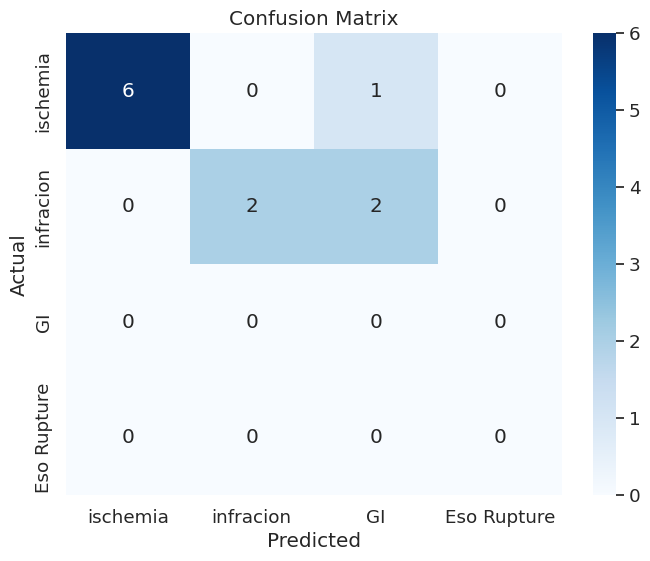

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the actual and predicted classes
actual = ["ischemia", "infracion", "ischemia", "ischemia", "infracion", "ischemia", "ischemia", "ischemia", "infracion", "infracion", "ischemia"]
predicted = ["ischemia", "GI", "ischemia", "ischemia", "GI", "ischemia", "ischemia", "GI", "infracion", "infracion", "ischemia"]

# Define the list of all possible classes
classes = ["ischemia", "infracion", "GI"]

# Create confusion matrix
cm = confusion_matrix(actual, predicted, labels=classes)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
import pandas as pd 

file_path = 'test.csv'
df = pd.read_csv(file_path)

df.head()

,live/beta,desease,status,model_output,symptoms
0,live,GI,pass,"GI, Aortic Dissection","Vomiting, Acid reflux, Hours, Gradual, G.I. (g..."
1,beta,GI,pass,"GI, Eso rupture","Vomiting, Acid reflux, Hours, Gradual, G.I. (g..."
2,live,Aortic Dissection,pass,"Aortic Dissection, Infarct","Persistent, Onset at rest, Splitting, Heavines..."
3,beta,Aortic Dissection,pass,"Aortic Dissection, Eso rupture","Persistent, Onset at rest, Splitting, Heavines..."
4,live,CHF,pass,"CHF, Pulmonary","Tightness, Short of breath, Heaviness, Subacut..."


In [39]:
live_data = df[df['live/beta'] == 'live']
beta_data = df[df['live/beta'] == 'beta']

print("Live Data:")
print(live_data)

# Display the beta data
print("\nBeta Data:")
print(beta_data)

Live Data:
      live/beta            desease status                model_output  \
0          live                 GI   pass       GI, Aortic Dissection   
2          live  Aortic Dissection   pass  Aortic Dissection, Infarct   
4          live                CHF   pass              CHF, Pulmonary   
6          live                 MS   pass                     MS, CHF   
8          live  Aortic Dissection   pass  Aortic Dissection, Infarct   
...         ...                ...    ...                         ...   
10408      live                 MS   pass                     MS, CHF   
10410      live  Aortic Dissection   pass  Aortic Dissection, Infarct   
10412      live          Pulmonary   pass               Pulmonary, PE   
10414      live                 GI   fail  Aortic Dissection, Infarct   
10416      live                CHF   pass              CHF, Pulmonary   

                                                symptoms  
0      Vomiting, Acid reflux, Hours, Gradual, G.I. (g

In [40]:
live_actual_predict = live_data['desease']
live_model_predict = live_data['model_output'].str.split(',')

live_model_predict

0             [GI,  Aortic Dissection]
2        [Aortic Dissection,  Infarct]
4                    [CHF,  Pulmonary]
6                           [MS,  CHF]
8        [Aortic Dissection,  Infarct]
                     ...              
10408                       [MS,  CHF]
10410    [Aortic Dissection,  Infarct]
10412                 [Pulmonary,  PE]
10414    [Aortic Dissection,  Infarct]
10416                [CHF,  Pulmonary]
Name: model_output, Length: 5209, dtype: object

In [41]:
for row in live_model_predict:
    print (row)
    print(len(row))

['GI', ' Aortic Dissection']
2
['Aortic Dissection', ' Infarct']
2
['CHF', ' Pulmonary']
2
['MS', ' CHF']
2
['Aortic Dissection', ' Infarct']
2
['CHF', ' Pulmonary']
2
['MS', ' CHF']
2
['Infarct', ' Ischemia']
2
['CHF', ' Pulmonary']
2
['Infarct', ' Ischemia']
2
['GI', ' Aortic Dissection']
2
['GI', ' Aortic Dissection']
2
['Aortic Dissection', ' GI']
2
['Infarct', ' CHF']
2
['Infarct', ' Ischemia']
2
['Infarct', ' Ischemia']
2
['PE', ' Pulmonary']
2
['Pulmonary', ' Infarct']
2
['PE', ' Pericarditis']
2
['Pulmonary', ' PE']
2
['Aortic Dissection', ' Infarct']
2
['Pulmonary', ' Infarct']
2
['PE', ' Pulmonary']
2
['Infarct', ' Ischemia']
2
['Infarct', ' Ischemia']
2
['Infarct', ' Ischemia']
2
['Aortic Dissection', ' Infarct']
2
['GI', ' Aortic Dissection']
2
['Aortic Dissection', ' Infarct']
2
['Infarct', ' Aortic Dissection']
2
['CHF', ' Pulmonary']
2
['Infarct', ' Ischemia']
2
['Pulmonary', ' Infarct']
2
['Pulmonary', ' Infarct']
2
['Infarct', ' Ischemia']
2
['MS', ' CHF']
2
['Infarct'

In [42]:
live_fail_data = df[(df['live/beta'] == 'live') & (df['status'] == 'fail')]
live_fail_data

,live/beta,desease,status,model_output,symptoms
14,live,AS/AI,fail,"Infarct, Ischemia","Exertional, Diffuse, Central, Short of breath,..."
26,live,AS/AI,fail,"Infarct, CHF","Dull, Diffuse, Intermittent, Months, AS/AI (Ao..."
28,live,AS/AI,fail,"Infarct, Ischemia","Diffuse, Retrosternal, Subacute, Left side, AS..."
30,live,AS/AI,fail,"Infarct, Ischemia","Months, Dull, Intermittent, Pressure, AS/AI (A..."
34,live,Pericarditis,fail,"Pulmonary, Infarct","Persistent, Heaviness, Severe, Gradual, Perica..."
...,...,...,...,...,...
10382,live,Eso rupture,fail,"Pulmonary, Infarct","Jaw, Onset at rest, Tearing, Sweating, CTD (co..."
10386,live,AS/AI,fail,"Ischemia, Infarct","Pressure, Subacute, Nitrate relief, Weeks, AS/..."
10390,live,Eso rupture,fail,"Infarct, Pulmonary","Central, Sweating, Eating, Gripping, Esophagus..."
10404,live,AS/AI,fail,"CHF, Pulmonary","Weeks, Subacute, Months, Short of breath, AS/A..."


In [43]:
live_pass_data = df[(df['live/beta'] == 'live') & (df['status'] == 'pass')]
live_pass_data

,live/beta,desease,status,model_output,symptoms
0,live,GI,pass,"GI, Aortic Dissection","Vomiting, Acid reflux, Hours, Gradual, G.I. (g..."
2,live,Aortic Dissection,pass,"Aortic Dissection, Infarct","Persistent, Onset at rest, Splitting, Heavines..."
4,live,CHF,pass,"CHF, Pulmonary","Tightness, Short of breath, Heaviness, Subacut..."
6,live,MS,pass,"MS, CHF","Sharp, Improvement with Bending, Intermittent,..."
8,live,Aortic Dissection,pass,"Aortic Dissection, Infarct","Diffuse, Tearing, Pressure, Persistent, CTD (c..."
...,...,...,...,...,...
10406,live,Ischemia,pass,"Infarct, Ischemia","Severe, Central, Onset at rest, Left arm, Infa..."
10408,live,MS,pass,"MS, CHF","Intermittent, Positional, Tender, Days, Muscul..."
10410,live,Aortic Dissection,pass,"Aortic Dissection, Infarct","Tearing, Splitting, Diffuse, Minutes, CTD (con..."
10412,live,Pulmonary,pass,"Pulmonary, PE","Short of breath, Fever, Gradual, Subacute, COP..."


In [44]:
live_data

,live/beta,desease,status,model_output,symptoms
0,live,GI,pass,"GI, Aortic Dissection","Vomiting, Acid reflux, Hours, Gradual, G.I. (g..."
2,live,Aortic Dissection,pass,"Aortic Dissection, Infarct","Persistent, Onset at rest, Splitting, Heavines..."
4,live,CHF,pass,"CHF, Pulmonary","Tightness, Short of breath, Heaviness, Subacut..."
6,live,MS,pass,"MS, CHF","Sharp, Improvement with Bending, Intermittent,..."
8,live,Aortic Dissection,pass,"Aortic Dissection, Infarct","Diffuse, Tearing, Pressure, Persistent, CTD (c..."
...,...,...,...,...,...
10408,live,MS,pass,"MS, CHF","Intermittent, Positional, Tender, Days, Muscul..."
10410,live,Aortic Dissection,pass,"Aortic Dissection, Infarct","Tearing, Splitting, Diffuse, Minutes, CTD (con..."
10412,live,Pulmonary,pass,"Pulmonary, PE","Short of breath, Fever, Gradual, Subacute, COP..."
10414,live,GI,fail,"Aortic Dissection, Infarct","Vomiting, Intermittent, Right side, Central, G..."


In [45]:
live_fail_actual_predict = live_fail_data['desease'].tolist()
live_fail_model_predict = live_fail_data['model_output'].str.split(',').str[0].tolist()

print(live_fail_actual_predict)
live_fail_model_predict

['AS/AI', 'AS/AI', 'AS/AI', 'AS/AI', 'Pericarditis', 'GI', 'Pericarditis', 'GI', 'GI', 'Eso rupture', 'CHF', 'Eso rupture', 'AS/AI', 'AS/AI', 'AS/AI', 'Eso rupture', 'AS/AI', 'Aortic Dissection', 'Eso rupture', 'AS/AI', 'Eso rupture', 'Eso rupture', 'Pericarditis', 'Pericarditis', 'GI', 'Aortic Dissection', 'Ischemia', 'Eso rupture', 'Eso rupture', 'AS/AI', 'Pericarditis', 'Eso rupture', 'Eso rupture', 'AS/AI', 'AS/AI', 'GI', 'Eso rupture', 'AS/AI', 'Eso rupture', 'Eso rupture', 'Eso rupture', 'GI', 'Eso rupture', 'AS/AI', 'Aortic Dissection', 'AS/AI', 'AS/AI', 'Eso rupture', 'Eso rupture', 'Eso rupture', 'Eso rupture', 'AS/AI', 'GI', 'Aortic Dissection', 'AS/AI', 'AS/AI', 'AS/AI', 'AS/AI', 'AS/AI', 'Eso rupture', 'Eso rupture', 'AS/AI', 'GI', 'Ischemia', 'Aortic Dissection', 'Eso rupture', 'AS/AI', 'AS/AI', 'Pericarditis', 'Eso rupture', 'Eso rupture', 'Eso rupture', 'GI', 'CHF', 'Aortic Dissection', 'AS/AI', 'Eso rupture', 'GI', 'AS/AI', 'Eso rupture', 'GI', 'Aortic Dissection', 'AS/

['Infarct',
 'Infarct',
 'Infarct',
 'Infarct',
 'Pulmonary',
 'Aortic Dissection',
 'Pulmonary',
 'Infarct',
 'Aortic Dissection',
 'Pulmonary',
 'Pulmonary',
 'Infarct',
 'Infarct',
 'CHF',
 'Infarct',
 'PE',
 'Infarct',
 'Infarct',
 'Infarct',
 'Infarct',
 'Pulmonary',
 'Aortic Dissection',
 'Infarct',
 'Infarct',
 'Aortic Dissection',
 'Infarct',
 'Infarct',
 'Pulmonary',
 'PE',
 'Infarct',
 'Infarct',
 'Pulmonary',
 'PE',
 'Infarct',
 'Infarct',
 'Aortic Dissection',
 'Infarct',
 'Infarct',
 'Pulmonary',
 'PE',
 'Infarct',
 'Aortic Dissection',
 'Infarct',
 'Infarct',
 'Infarct',
 'Infarct',
 'CHF',
 'PE',
 'Infarct',
 'Infarct',
 'Infarct',
 'Infarct',
 'Aortic Dissection',
 'Infarct',
 'Ischemia',
 'Pulmonary',
 'Infarct',
 'Infarct',
 'Infarct',
 'Aortic Dissection',
 'Pulmonary',
 'Infarct',
 'Aortic Dissection',
 'Infarct',
 'Infarct',
 'Pulmonary',
 'Infarct',
 'Infarct',
 'Pulmonary',
 'Pulmonary',
 'GI',
 'Pulmonary',
 'Aortic Dissection',
 'Ischemia',
 'Infarct',
 'Infarc

In [46]:
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
cm = confusion_matrix(live_fail_actual_predict, live_fail_model_predict)

# Get unique labels from the actual predictions
labels = sorted(set(live_fail_actual_predict + live_fail_model_predict))

# Convert confusion matrix to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
cm_df


,AS/AI,Aortic Dissection,CHF,Eso rupture,GI,Infarct,Ischemia,MS,PE,Pericarditis,Pulmonary
AS/AI,0,0,68,0,0,241,54,0,0,0,4
Aortic Dissection,0,0,0,0,0,74,0,0,0,0,0
CHF,0,0,0,0,0,4,12,0,0,0,4
Eso rupture,0,37,0,0,15,124,0,1,114,6,165
GI,0,142,0,0,0,33,0,0,0,0,0
Infarct,0,0,0,0,0,0,0,0,0,0,0
Ischemia,0,0,0,0,0,41,0,0,0,0,2
MS,0,0,6,0,0,0,0,0,0,0,0
PE,0,0,0,0,0,0,0,0,0,0,0
Pericarditis,0,0,1,0,0,34,0,0,1,0,34


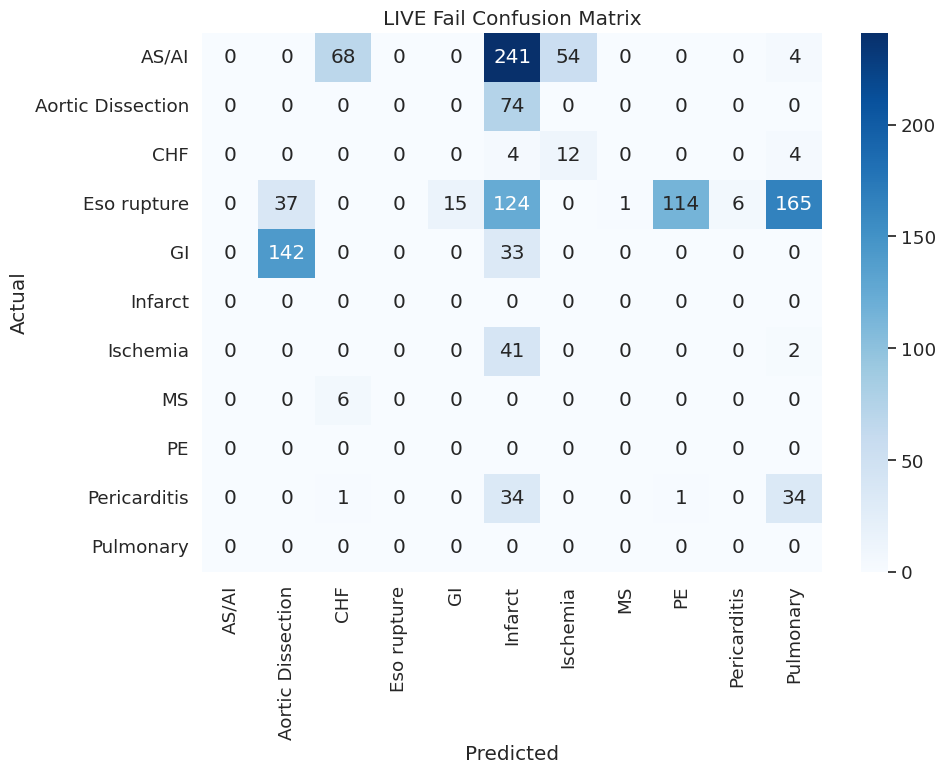

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming live_fail_actual_predict and live_fail_model_predict are already created

# Create the confusion matrix
cm = confusion_matrix(live_fail_actual_predict, live_fail_model_predict)

# Get unique labels from the actual predictions
labels = sorted(set(live_fail_actual_predict + live_fail_model_predict))

# Convert confusion matrix to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')  # Use 'd' format to display integer counts
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LIVE Fail Confusion Matrix')
plt.show()


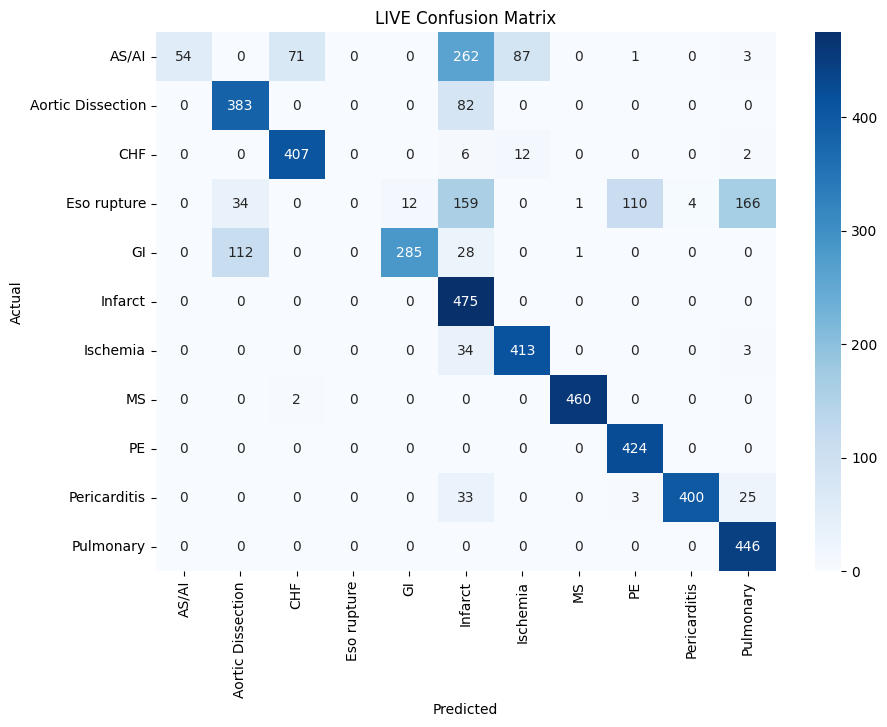

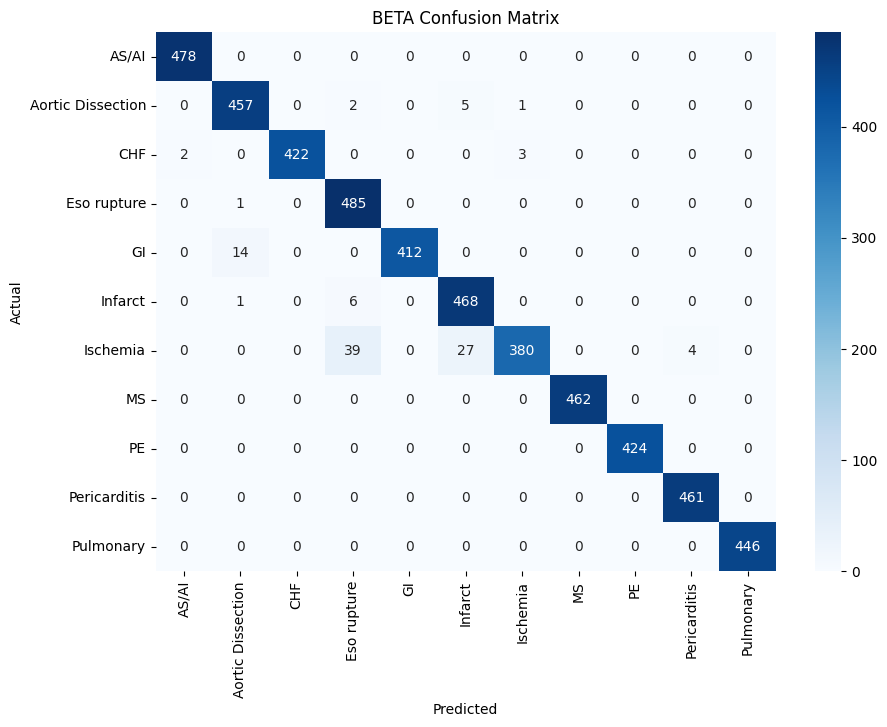

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

DISEASES = ['Aortic Dissection', 'AS/AI', 'CHF', 'Eso rupture', 'GI', 'Infarct', 'Ischemia', 'MS', 'PE', 'Pericarditis', 'Pulmonary']


# file_path = 'test.csv'
file_path = 'testcsvs/random_symptoms_test.csv'
df = pd.read_csv(file_path)

# separate live and beta
live_data = df[df['live/beta'] == 'live']
beta_data = df[df['live/beta'] == 'beta']


# all live actual and model_predict data
live_actual_predict = live_data['desease']
live_model_predict = live_data['model_output'].str.split(',')

# filter live pass and fail data because both will integrate diff logic
live_fail_data = df[(df['live/beta'] == 'live') & (df['status'] == 'fail')]
live_pass_data = df[(df['live/beta'] == 'live') & (df['status'] == 'pass')]

# On Live Fail, separate actual and model_predict data 
# In model_output it has 2 disease in list, so pick the first 
live_fail_actual_predict = live_fail_data['desease'].tolist()
live_fail_model_predict = live_fail_data['model_output'].str.split(',').str[0].tolist()

# On Live Pass, separate actual and model_predict data 
live_pass_actual_predict = live_pass_data['desease'].tolist()
live_pass_model_predict = live_pass_actual_predict


# mix both Pass and Fail    data of    actual and model_predict
live_actual_data = live_fail_actual_predict + live_pass_actual_predict
live_model_predict_data = live_fail_model_predict + live_pass_model_predict

# Create the confusion matrix
cm = confusion_matrix(live_actual_data, live_model_predict_data)

# Get unique labels from the actual predictions
labels = sorted(set(live_actual_data + live_model_predict_data))

# Convert confusion matrix to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')  # Use 'd' format to display integer counts
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LIVE Confusion Matrix')
plt.show()





beta_data = df[df['live/beta'] == 'beta']

# all beta actual and model_predict data
beta_actual_predict = beta_data['desease']
beta_model_predict = beta_data['model_output'].str.split(',')

# filter beta pass and fail data because both will integrate diff logic
beta_fail_data = df[(df['live/beta'] == 'beta') & (df['status'] == 'fail')]
beta_pass_data = df[(df['live/beta'] == 'beta') & (df['status'] == 'pass')]

# On beta Fail, separate actual and model_predict data 
# In model_output it has 2 disease in list, so pick the first 
beta_fail_actual_predict = beta_fail_data['desease'].tolist()
beta_fail_model_predict = beta_fail_data['model_output'].str.split(',').str[0].tolist()

# On beta Pass, separate actual and model_predict data 
beta_pass_actual_predict = beta_pass_data['desease'].tolist()
beta_pass_model_predict = beta_pass_actual_predict


# mix both Pass and Fail    data of    actual and model_predict
beta_actual_data = beta_fail_actual_predict + beta_pass_actual_predict
beta_model_predict_data = beta_fail_model_predict + beta_pass_model_predict

# Create the confusion matrix
cm = confusion_matrix(beta_actual_data, beta_model_predict_data)

# Get unique labels from the actual predictions
labels = sorted(set(beta_actual_data + beta_model_predict_data))

# Convert confusion matrix to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')  # Use 'd' format to display integer counts
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BETA Confusion Matrix')
plt.show()
